Introduction: 
The increase in the population and the increase in sophistications have led to the increase in the use of private transports. Though the environmental concerns are creating awareness among individuals letting them take a public transport for commute, the car accident cases still prevail and there seems to be no significant declines. The car accidents severity is very crucial as it helps us understand better the damages involved with it. 

Data: 
The dataset that is considered for the project is the one provided in the class on the car accident severity. The dataset provides various parameters related to the accident severity. I would like to analyze the accident severity based on weather, road condition, light condition and address type. The various machine learning algorithm will be used and best one will be choosen.

In [47]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [48]:
df = pd.read_csv (r'/Users/madhumithrasubramaniankarthikesh/Downloads/Data-Collisions.csv')
df.head()

/Users/madhumithrasubramaniankarthikesh/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [49]:
df.shape

(194673, 38)

In [50]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



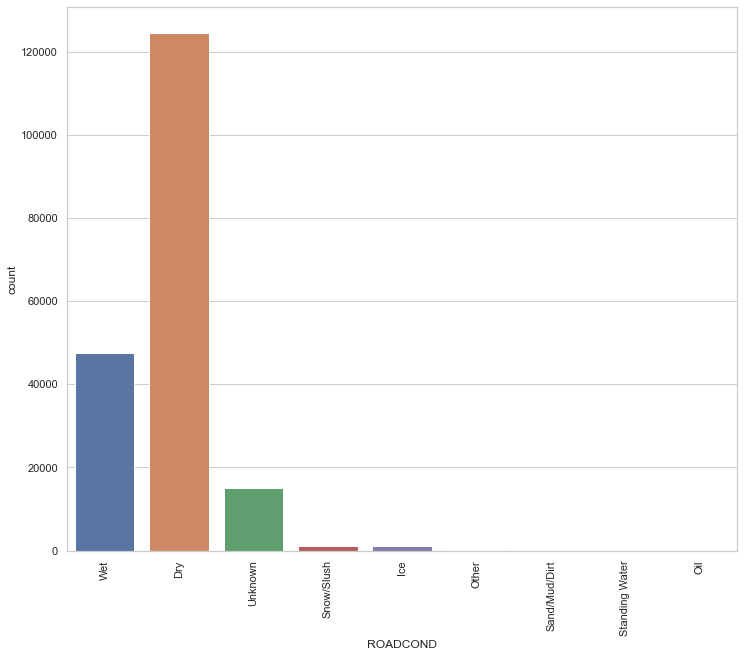

In [51]:
import seaborn as sns
sns.set(style="whitegrid")
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
ax = sns.countplot(x=df.ROADCOND)

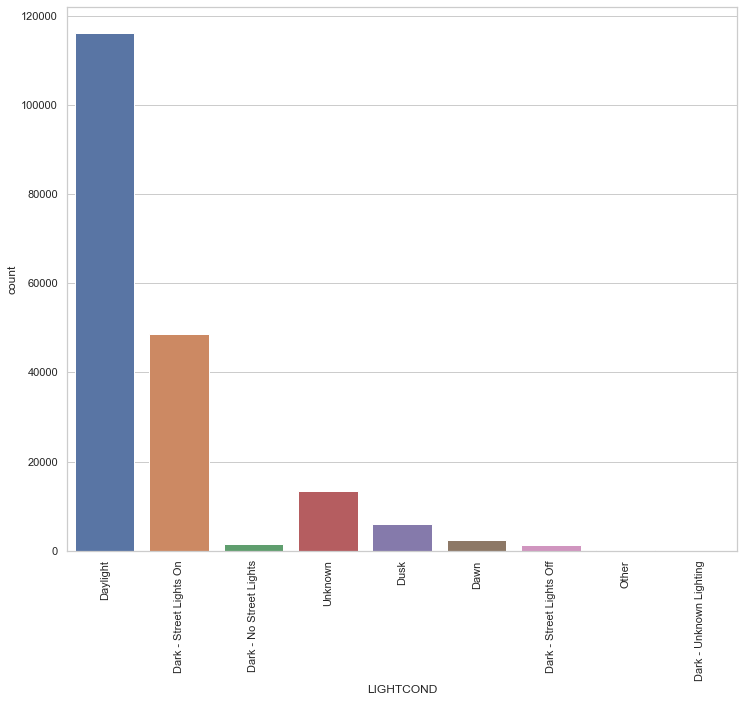

In [52]:
import seaborn as sns
sns.set(style="whitegrid")
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
ax = sns.countplot(x=df.LIGHTCOND)

In [53]:
df['ROADCOND'] = df['ROADCOND'].fillna(0.19)
df.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize=True)
df['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'], value=[0,2,5,4,1,3,0.2,0.3,0.1],inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,0.1,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,0.1,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,0.0,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,0.0,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,0.1,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [54]:
df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0.19)
df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize=True)
df['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'], value=[0,1,2,3,4,5,0.01,0.1,0.2],inplace=True)
Feature = df[['ROADCOND','LIGHTCOND']]
Feature.head()
X = Feature
X[0:5]
y = df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [55]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.04810585,  0.77442718],
       [ 0.04810585, -0.83702292],
       [-0.27840017,  0.77442718],
       [-0.27840017,  0.77442718],
       [ 0.04810585,  0.77442718]])

In [56]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 2) (155738,)
Test set: (38935, 2) (38935,)


In [57]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.50861693, 0.36874278, 0.50877103, 0.50473867, 0.5537691 ,
       0.55197123, 0.70268396, 0.68840375, 0.70268396, 0.63092333,
       0.64556312, 0.64504944, 0.70288943, 0.64579427])

In [58]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 14
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model
# just for sanity check
yhat = kNN_model.predict(X_test)
yhat

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', ...,
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [59]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, yhat, average='weighted'))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.48
KNN F1-score: 0.60


In [60]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model
yhat = DT_model.predict(X_test)
yhat

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', ...,
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [61]:
print("DT Jaccard index: %.2f" % jaccard_score(y_test, yhat, average='weighted'))
print("DT F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

DT Jaccard index: 0.50
DT F1-score: 0.58


In [62]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
yhat = SVM_model.predict(X_test)
yhat

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', ...,
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [63]:
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, yhat, average='weighted'))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

SVM Jaccard index: 0.50
SVM F1-score: 0.58


In [64]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model
yhat = LR_model.predict(X_test)
yhat

array(['Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', ...,
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision'], dtype=object)

In [65]:
print("LR Jaccard index: %.2f" % jaccard_score(y_test, yhat, average='weighted'))
print("LR F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

LR Jaccard index: 0.50
LR F1-score: 0.58
